# check for significance in FMA and Utah arrays for TH and DR

In [4]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from scipy.stats import normaltest
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scikit_posthocs import posthoc_dunn, posthoc_conover
plt.rcParams['svg.fonttype'] = 'none'

# epineuralDF = pd.read_csv("epineural\\selectiveDF.csv")
# epineuralDF.loc[epineuralDF['binarySearchRes']==0.4,'binarySearchRes'] = 0.41
# epiTH = epineuralDF['Threshold (nC)']
# epiDR = epineuralDF['Dynamic Range (nC)']


penetratingDF = pd.read_csv("selectiveDF.csv")
penTH = penetratingDF['Threshold (nC)']
penDR = penetratingDF['Dynamic Range (nC)']

In [12]:
utahTH = penetratingDF[(penetratingDF['subject'] == 'Galactus') | (penetratingDF['subject'] == 'Hobgoblin')]['Threshold (nC)']
FMATH = penetratingDF[(penetratingDF['subject'] == 'Electro') | (penetratingDF['subject'] == 'Freeze')]['Threshold (nC)']

utahDR = penetratingDF[(penetratingDF['subject'] == 'Galactus') | (penetratingDF['subject'] == 'Hobgoblin')]['Dynamic Range (nC)']
FMADR = penetratingDF[(penetratingDF['subject'] == 'Electro') | (penetratingDF['subject'] == 'Freeze')]['Dynamic Range (nC)']

In [14]:
# threshold normality
alpha = 0.01
k, p1 = normaltest(utahTH) # len(penTH)

if p1 < alpha:  # null hypothesis: x comes from a normal distribution
    print("utahTH does not come from a normal distribution")
else:
    print("utahTH may be normal")

k, p2 = normaltest(FMATH) # len(epiTH)

if p2 < alpha:  # null hypothesis: x comes from a normal distribution
    print("FMATH does not come from a normal distribution")
else:
    print("FMATH may be normal")


utahTH does not come from a normal distribution
FMATH does not come from a normal distribution


In [15]:
# dynamic range normality'
k, p3 = normaltest(utahDR) # len(penTH)

if p3 < alpha:  # null hypothesis: x comes from a normal distribution
    print("penDR does not come from a normal distribution")
else:
    print("penDR may be normal")

k, p4 = normaltest(FMADR) # len(epiTH)

if p4 < alpha:  # null hypothesis: x comes from a normal distribution
    print("epiDR does not come from a normal distribution")
else:
    print("epiDR may be normal")

penDR does not come from a normal distribution
epiDR does not come from a normal distribution


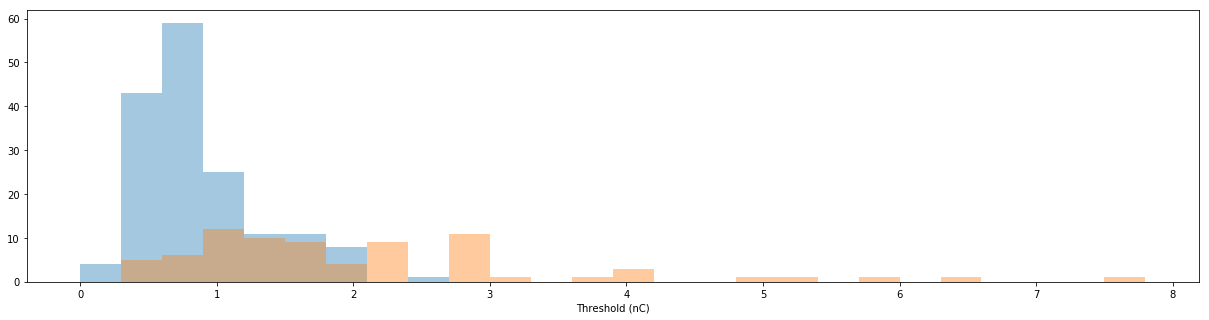

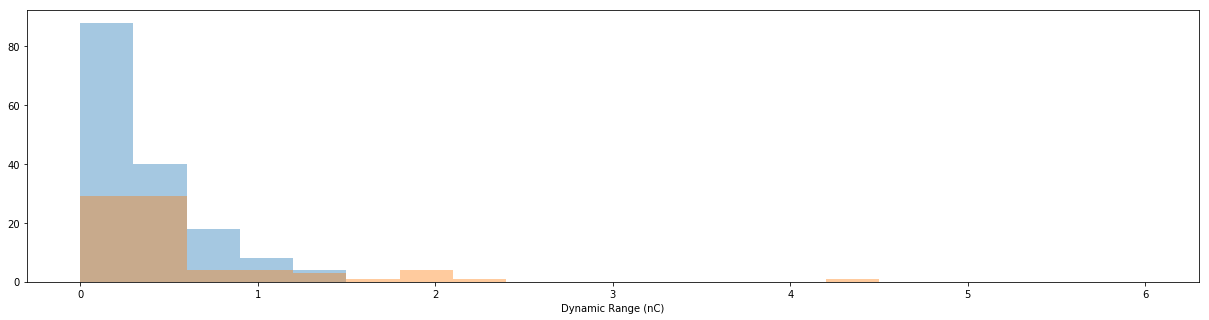

In [22]:
f,ax = plt.subplots(figsize=(21,5))
binSize = np.arange(0, max(utahTH), .3)
sns.distplot(utahTH,bins = binSize,kde = False)
# ax[0].set_title('Epineural thresholds')

binSize = np.arange(0, max(FMATH), .3)
sns.distplot(FMATH,bins = binSize,kde = False)
# ax[1].set_title('Penetrating thresholds')

f,ax2 = plt.subplots(figsize=(21,5))
binSize = np.arange(0, max(utahDR), 0.3)
sns.distplot(utahDR,bins = binSize,kde = False)
# ax2[0].set_title('v1 DR')

binSize = np.arange(0, max(FMADR), 0.3)
sns.distplot(FMADR,bins = binSize,kde = False)
# ax2[1].set_title('v2 DR')

In [23]:
k, p5 = kruskal(utahTH, FMATH)
if p5 < alpha:
    print("The difference between utahTH and FMATH is statistically significant")
else:
    print("not significant")

The difference between utahTH and FMATH is statistically significant


In [24]:
k, p5 = kruskal(utahDR, FMADR)
if p5 < alpha:
    print("The difference between utahTH and FMATH is statistically significant")
else:
    print("not significant")

not significant
